<a href="https://colab.research.google.com/github/EddyGiusepe/Classificacao_basica_REDE_NEURAL/blob/main/Rede_Neural_classificacao_basica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='red'>Treinando a nossa primeira rede neural: classificação básica</font>

**Índice:**
* Importe a base de Dados Fashion MNIST
* Exploreos Dados
* Pré-processe os Dados
* Construindo o modelo
  * Montar as camadas
  * Compile o modelo
* Treine o modelo
* Avalie a acurácia
* Faça predições


Este tutorial treina um modelo de rede neural para **classificação de imagens de roupas**, como tênis e camisetas. Tudo bem se você não entender todos os detalhes; este é uma visão geral de um programa do ``TensorFlow`` com detalhes explicados enquanto progredimos.

O guia usa [tf.keras](https://www.tensorflow.org/guide/keras?hl=pt_br), uma API alto-nível para construir e treinar modelos no TensorFlow.

### <font color='blue'>Importamos a nossas livrarias</font>


In [1]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Livrarieas auxiliares
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline



print(tf.__version__)


2.4.1


### <font color='blue'>Importe a base de dados Fashion MNIST</font>

Esse tutorial usa a base de dados **Fashion MNIST** que contém $70\,000$ imagens em tons de cinza em 10 categorias. As imagens mostram artigos individuais de roupas com baixa resolução ($28$ por $28$ pixels), como vemos aqui:

![alt text](https://tensorflow.org/images/fashion-mnist-sprite.png)

**Fashion MNIST** tem como intenção substituir a clássica base de dados [MNIST](http://yann.lecun.com/exdb/mnist/)— frequentemente usada como "_Hello, World_" de programas de aprendizado de máquina (**machine learning**) para visão computacional. A base de dados MNIST contém imagens de dígitos escritos à mão (0, 1, 2, etc.) em um formato idêntico ao dos artigos de roupas que usaremos aqui.

Esse tutorial usa a **Fashion MNIST** para variar, e porque é um problema um pouco mais desafiador que o regular MNIST. Ambas bases são relativamente pequenas e são usadas para verificar se um algoritmo funciona como esperado. Elas são bons pontos de partida para testar e debugar código.

**Usaremos $60\,000$ imagens para treinar nossa rede e $10\,000$ imagens para avaliar quão precisamente nossa rede aprendeu a classificar as imagens**. Você pode acessar a Fashion MNIST directly diretamente do TensorFlow. Importe e carregue a base Fashion MNIST diretamente do TensorFlow:

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Carregando a base de dados que retorna quatro NumPy arrays:

* Os arrays `train_images` e `train_labels` são o conjunto de treinamento — os dados do modelo usados para aprender.

* O modelo é testado com o _conjunto de teste_, os arrays `test_images` e `test_labels`.

As imagens são arrays NumPy de $28$x$28$, com os valores dos pixels entre $0$ to $255$. As labels (**alvo da classificação**) são um array de inteiros, no intervalo de $0$ a $9$. Esse corresponde com a classe de roupa que cada imagem representa:

Label | Classe
:---: | :---:
0	| Camisetas/Top (T-shirt/top)
1	| Calça (Trouser)
2	| Suéter (Pullover)
3	| Vestidos (Dress)
4	| Casaco (Coat)
5	| Sandálias (Sandal)
6	| Camisas (Shirt)
7	| Tênis (Sneaker)
8	| Bolsa (Bag)
9	| Botas (Ankle boot)



Cada imagem é mapeada com um só label. Já que o nome das classes não são incluídas na base de dados, armazene os dados aqui para usá-los mais tarde quando plotarmos as imagens:

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

### <font color='blue'>Explorando os dados</font>

Vamos explorar o formato da base de dados antes de treinar o modelo. O próximo comando mostra que existem $60\,000$ imagens no conjunto de treinamento, e cada imagem é representada em $28$x$28$ pixels:

In [5]:
train_images.shape

(60000, 28, 28)

Do mesmo modo, existem $60\,000$ labels no conjunto de treinamento:

In [6]:
train_labels.shape

(60000,)

In [7]:
len(train_labels)

60000

Cada label é um inteiro entre $0$ e $9$:

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Existem $10\,000$ imagens no conjunto de teste. Novamente, cada imagem é representada por $28$x$28$ pixels:

In [11]:
test_images.shape


(10000, 28, 28)

E um conjunto de teste contendo $10\,000$ labels das imagens:

In [12]:
len(test_labels)

10000

### <font color='blue'>Pré-processamento dos dados</font>

Os dados precisam ser pré-processados antes de treinar a rede. Se você inspecionar a primeira imagem do conjunto de treinamento, você verá que os valores dos pixels estão entre $0$ e $255$:

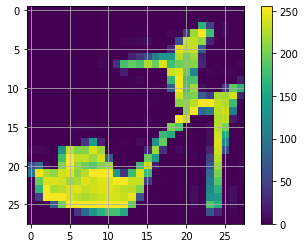

In [13]:
plt.figure()
plt.imshow(train_images[9])
plt.colorbar()
plt.grid(True)
plt.show()


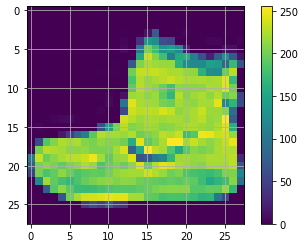

In [14]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(True)
plt.show()

**Escalaremos esses valores no intervalo de $0$ e $1$ antes de alimentar o modelo da rede neural**. Para fazer isso, dividimos os valores por $255$. É importante que o conjunto de **treinamento** e o conjunto de **teste** podem ser pré-processados do mesmo modo:

In [15]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Para verificar que os dados estão no formato correto e que estamos prontos para construir e treinar a rede, vamos **mostrar as primeiras 25 imagens do conjunto de treinamento** e mostrar o nome das classes de cada imagem abaixo.

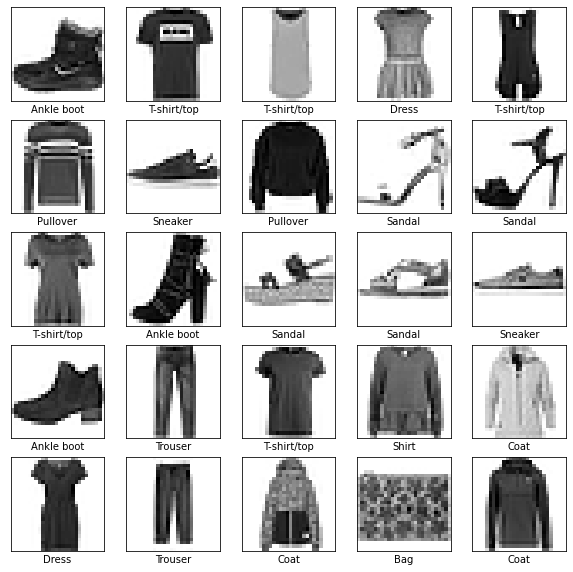

In [16]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True )
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()    


### <font color='blue'>Construindo o modelo</font>

Construir a rede neural requer configurar as camadas do modelo, e depois, compilar o modelo.

#### Montar as camadas

**O principal bloco de construção da rede neural é a camada (layer)**. As camadas (layers) extraem representações dos dados inseridos na rede. Com sorte, essas representações são significativas para o problema à mão.

Muito do **deep learning** consiste encadear simples camadas. Muitas camadas, como `tf.keras.layers.Dense`, tem paramêtros que são aprendidos durante o treinamento.

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape= (28, 28)),
    keras.layers.Dense(128, activation= 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

A primeira camada da rede, `tf.keras.layers.Flatten`, transforma o formato da imagem de um <font color='orange'>array de imagens de duas dimensões</font> (**de $28$x$28$ pixels**) para um <font color='orange'>array de uma dimensão</font> (**de $28$x$28$ = $784$pixels**). Pense nessa camada como camadas não empilhadas de pixels de uma imagem e os emfilere. Essa camada não tem paramêtros para aprender; **ela só reformata os dados**.

Depois dos pixels serem achatados, a rede consiste de uma sequência de duas camadas `tf.keras.layers.Dense`. Essa são camadas neurais **densely connected** (_densamente conectado_), ou **fully connected** (_totalmente conectado_). A <font color='orange'>primeira camada</font> Dense tem 128 nós (ou neurônios). A <font color='orange'>segunda (e última)</font> camada é uma **softmax** de 10 nós que retorna um array de $10$ probabilidades, cuja soma resulta em $1$. Cada nó contem um valor que indica a probabilidade de que aquela imagem pertence a uma das $10$ classes.


### Compile o modelo


Antes do modelo estar pronto para o treinamento, é necessário algumas configurações a mais. Essas serão adicionadas no passo de **compilação**:

* <font color='blue'>Função Loss</font> - Essa mede quão precisa o modelo é durante o treinamento. **Queremos minimizar a função** para guiar o modelo para direção certa.

* <font color='blue'>Optimizer</font> - Isso é como o modelo se atualiza com base no dado que ele vê e sua função loss.

* <font color='blue'>Métricas</font> - usadas para monitorar os passos de treinamento e teste. O exemplo abaixo usa a **acurácia**, a fração das imagens que foram classificadas corretamente.


In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Nota: 
# Se você quiser fornecer rótulos como inteiros, 
# use Sparse_Categorical_Crossentropy

### <font color='blue'>Treinando o modelo</font>

Treinar a rede neural requer os seguintes passos:

1. Alimente com os dados de treinamento, o modelo. Neste exemplo, os dados de treinamento são os arrays `train_images` e `train_labels`.


2. O modelo aprende como associar as imagens às labels.


3. Perguntamos ao modelo para fazer previsões sobre o conjunto de teste — nesse exemplo, o array `test_images`. Verificamos se as previsões combinaram com as labels do array `test_labels`.

Para começar a treinar, chame o método `model.fit`— assim chamado, porque ele "encaixa" o modelo no conjunto de treinamento:

In [19]:
model.fit(train_images, train_labels, epochs=40)

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6192 - accuracy: 0.7834
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3829 - accuracy: 0.8610
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3336 - accuracy: 0.8760
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3154 - accuracy: 0.8853
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2900 - accuracy: 0.8921
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2793 - accuracy: 0.8964
Epoch 7/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2653 - accuracy: 0.9026
Epoch 8/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2529 - accuracy: 0.9052
Epoch 9/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2446 - accuracy: 0.9116
Epoch 10/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.230

À medida que o modelo treina, as métricas: **loss** e **acurácia** são mostradas. O modelo atinge uma acurácia de $0.88$ (ou $88\%$) com o conjunto de treinamento.

### <font color='blue'>Avalie a acurácia</font>

Depois, compare como o modelo performou com o conjunto de teste:

In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)


313/313 - 0s - loss: 0.4309 - accuracy: 0.8916


In [21]:
print('\nTest accuracy:', test_acc)


Test accuracy: 0.8916000127792358


Acabou que o a accurácia com o conjunto de teste é um pouco menor do que a acurácia de treinamento. Essa diferença entre as duas acurácias representa um **overfitting**. **Overfitting** é modelo de aprendizado de máquina performou de maneira pior em um conjunto de entradas novas, e não usadas anteriormente, que usando o conjunto de treinamento.

### <font color='blue'>Faça predições</font>

Com o modelo treinado, o usaremos para predições de algumas imagens.

In [22]:
predictions = model.predict(test_images)

Aqui, o modelo previu a **label** de cada imagem no conjunto de treinamento. Vamos olhar na primeira predição:

In [23]:
predictions[0]

array([8.8031654e-10, 7.2239275e-19, 3.0251714e-21, 4.5172123e-31,
       1.1761824e-12, 2.3354950e-07, 1.1872809e-12, 4.7057174e-06,
       9.2249765e-16, 9.9999511e-01], dtype=float32)

A predição é um array de $10$ números. Eles representam uma **confiança** do modelo que a imagem corresponde a cada um dos diferentes artigos de roupa. Podemos ver que cada **label** tem um maior valor de confiança: 

In [24]:
np.argmax(predictions[0])

9

Então, o modelo é confiante de que essa imagem é uma bota (ankle boot) ou `class_names[9]`. Examinando a label do teste, vemos que essa classificação é correta:

In [25]:
test_labels[0]

9

Podemos mostrar graficamente como se parece em um conjunto total de previsão de $10$ classes. 

In [26]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
               color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    
    

Vamos olhar a previsão imagem na posição $0$, do array de predição.

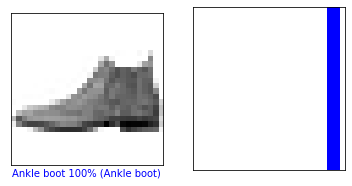

In [27]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

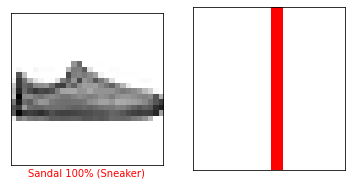

In [28]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

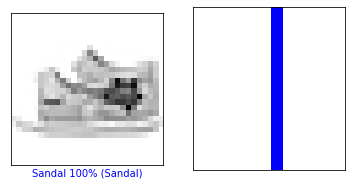

In [29]:
i = 9999
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

Vamos plotar algumas da previsão do modelo. **Labels preditas corretamente são azuis** e as **predições erradas são vermelhas**. O número dá a porcentagem (de $100$) das labels preditas. Note que o modelo pode errar mesmo estão confiante.

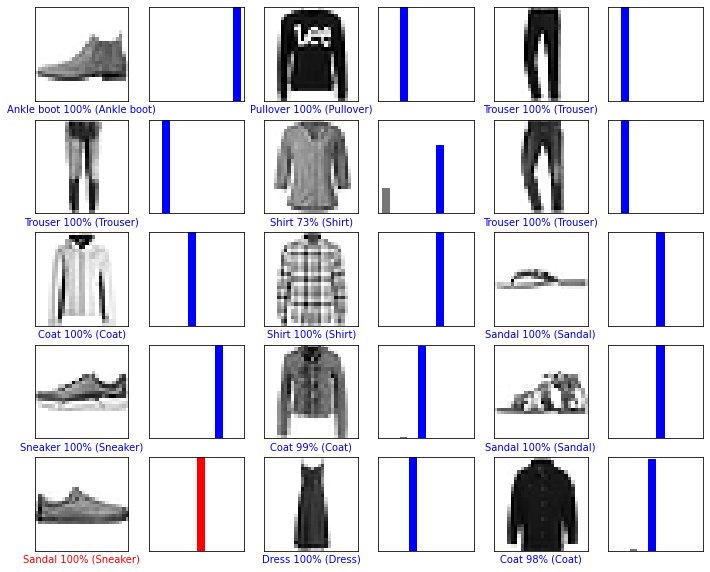

In [30]:
# Plota o primeiro X test images, e as labels preditas, e as labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.


num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

Finalmente, use o modelo treinado para fazer a predição de uma única imagem.

In [31]:
# Grab an image from the test dataset.
# Pegue uma imagem do conjunto de dados de teste

img = test_images[0]

print(img.shape)

(28, 28)


Modelos `tf.keras` são otimizados para fazer predições em um **batch**, ou **coleções**, de exemplos de uma vez. De acordo, mesmo que usemos uma única imagem, precisamos adicionar em uma lista:

In [32]:
# Adiciona a imagem em um batch que possui um só membro.

img = (np.expand_dims(img,0))

print(img.shape)


(1, 28, 28)


Agora prediremos a label correta para essa imagem:

In [33]:
predictions_single = model.predict(img)

print(predictions_single)

[[8.8031654e-10 7.2239275e-19 3.0251946e-21 4.5172123e-31 1.1761801e-12
  2.3355017e-07 1.1872809e-12 4.7057083e-06 9.2249405e-16 9.9999511e-01]]


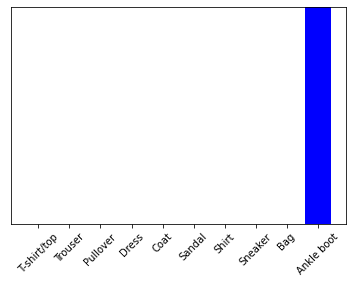

In [34]:
plot_value_array(0, predictions_single, test_labels)

_ = plt.xticks(range(10), class_names, rotation=45)

`model.predict` retorna a lista de listas — uma lista para cada imagem em um **batch** de dados. Pegue a predição de nossa (única) imagem no batch:

In [35]:
np.argmax(predictions_single[0])

9

**E, como antes, o modelo previu a label como 9**.